# Sentiment Analysis and Exploratory Data Analysis

In [1]:
# libraries
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from gensim.parsing.preprocessing import STOPWORDS
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

In [2]:
# loading last clean dataset and dtm
tweet_df_cleanR4 = pd.read_pickle('tweet_df_cleanR4.pkl')
dtm1 = pd.read_pickle('dtm1.pkl')
dtm1 = dtm1.transpose()

In [3]:
dtm1

,0,1,2,3,4,5,6,7,8,9,...,844,845,846,847,848,849,850,851,852,853
aaron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
able,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
absolute,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zoom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# finding the top 30 words by each user tweet
top_dict = {}
for user in dtm1.columns:
    top = dtm1[user].sort_values(ascending=False).head(30)
    top_dict[user]= list(zip(top.index, top.values))

list(top_dict.items())[:5]

[(0,
  [('officially', 0.31312620611202624),
   ('everyday', 0.2951377429079226),
   ('enhance', 0.2951377429079226),
   ('mark', 0.2951377429079226),
   ('evolve', 0.28237472515055084),
   ('play', 0.2724749594696581),
   ('big', 0.257547365635743),
   ('skill', 0.25162324418907545),
   ('life', 0.23749504151545078),
   ('resource', 0.2267958846742676),
   ('today', 0.20477145770375996),
   ('event', 0.20107223186581452),
   ('digital', 0.19604440371279214),
   ('week', 0.18249614405663828),
   ('learn', 0.16858072360904763),
   ('world', 0.14326849578080916),
   ('cyber', 0.14261162556590548),
   ('security', 0.10996809275380313),
   ('smart', 0.102424775912113),
   ('awareness', 0.056595055779844486),
   ('positive', 0.0),
   ('posing', 0.0),
   ('popup', 0.0),
   ('posed', 0.0),
   ('pose', 0.0),
   ('possibility', 0.0),
   ('possible', 0.0),
   ('post', 0.0),
   ('portout', 0.0),
   ('portal', 0.0)]),
 (1,
  [('password', 0.43587685154690875),
   ('puzzle', 0.2684975743665711),
  

In [5]:
# Top 15 words per user tweet for the first 10 user tweets
for user, top_words in top_dict.items():
        print(user)
        print(', '.join([word for word, count in top_words[0:14]]))
        print('---')
        if user == 9:
            break
        

0
officially, everyday, enhance, mark, evolve, play, big, skill, life, resource, today, event, digital, week
---
1
password, puzzle, managing, measure, piece, crucial, safely, thats, creating, youre, ensure, strong, resource, sharing
---
2
security, ransom, ware, smaller, assessment, information, importance, cyber, attack, step, news, cloud, phishing, crime
---
3
gadget, safety, device, tech, maximum, registered, owner, laptop, true, checker, lover, mei, store, life
---
4
fulfil, irreversible, halt, completepartial, obligation, contractual, grind, inability, consequence, damage, reputation, loss, want, operation
---
5
authentication, tried, microsofts, login, feature, love, factor, multifactor, microsoft, new, account, password, help, secure
---
6
speaking, nov, landscape, sign, going, whats, protected, webinar, cyber, stay, security, aware, aaron, popup
---
7
cyber, day, stay, tip, secure, awareness, security, smart, month, aware, portout, popup, popular, popli
---
8
tool, free, vendo

In [6]:
from collections import Counter

# Pull out the top 30 tweets for each user tweet
words = []
for user in dtm1.columns:
    top = [word for (word, count) in top_dict[user]]
    for t in top:
        words.append(t)
        
words[0:30]

['officially',
 'everyday',
 'enhance',
 'mark',
 'evolve',
 'play',
 'big',
 'skill',
 'life',
 'resource',
 'today',
 'event',
 'digital',
 'week',
 'learn',
 'world',
 'cyber',
 'security',
 'smart',
 'awareness',
 'positive',
 'posing',
 'popup',
 'posed',
 'pose',
 'possibility',
 'possible',
 'post',
 'portout',
 'portal']

In [7]:
# Aggregate this list and identify the most common words along with how many tweets they occur in
Counter(words).most_common()[1:30] # top 30

[('portal', 715),
 ('portability', 711),
 ('portout', 704),
 ('pose', 699),
 ('posed', 683),
 ('port', 680),
 ('security', 672),
 ('posing', 654),
 ('awareness', 647),
 ('popup', 647),
 ('positive', 621),
 ('possibility', 583),
 ('popular', 565),
 ('possible', 493),
 ('popli', 492),
 ('poorly', 403),
 ('post', 374),
 ('aware', 346),
 ('month', 334),
 ('poll', 324),
 ('aaron', 266),
 ('politics', 242),
 ('smart', 230),
 ('posted', 217),
 ('policy', 179),
 ('attack', 171),
 ('data', 171),
 ('sec', 161),
 ('information', 141)]

In [8]:
# create function for subjectivity 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [9]:
# Create two new columns
tweet_df_cleanR4_SA = tweet_df_cleanR4.copy()
tweet_df_cleanR4_SA['subjectivity'] = pd.DataFrame(tweet_df_cleanR4['description'].apply(getSubjectivity))
tweet_df_cleanR4_SA['polarity'] = pd.DataFrame(tweet_df_cleanR4['description'].apply(getPolarity))

In [10]:
# Show the new datafram with the new columns
tweet_df_cleanR4_SA.head(30)

,author,description,subjectivity,polarity
0,ECAatState,today officially mark cyber security awareness...,0.335714,0.003571
1,JuliePerrine,creating strong password crucial cyber securit...,0.625238,0.279524
2,craziart,importance smaller step security awareness sec...,0.550000,-0.050000
3,CyberSecurityN8,true owner give maximum protection registered ...,0.650000,0.350000
5,R___83___O,want know consequence ransom ware attack busin...,0.600000,-0.100000
7,NebulaITUK,multifactor authentication help account data s...,0.476136,0.321591
8,cybersec_feeds,speaking cyber webinar nov cyber security land...,0.250000,0.250000
9,aryannegi009,day tip stay cyber secure cyber aware part cyb...,0.497619,0.288095
16,911CyberMarket,national cyber security alliance ncsa educatin...,0.416667,0.175000
17,GNYHA,hospital health system use health insurance po...,0.250000,0.250000


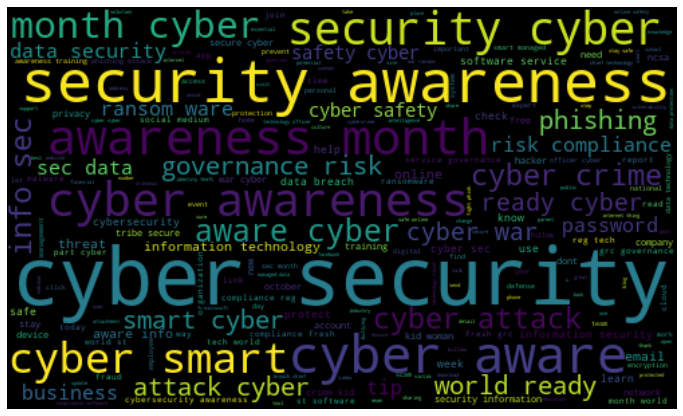

In [11]:
# Visualize by creating word cloud
allWords = ' '.join([text for text in tweet_df_cleanR4['description']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.figure(figsize=(12,8))
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [12]:
# add most common words to stop words and update DTM
add_stop_words = [word for word, count in Counter(words).most_common() if count > 250]
add_stop_words.append('cybersecurity')
add_stop_words

['cyber',
 'portal',
 'portability',
 'portout',
 'pose',
 'posed',
 'port',
 'security',
 'posing',
 'awareness',
 'popup',
 'positive',
 'possibility',
 'popular',
 'possible',
 'popli',
 'poorly',
 'post',
 'aware',
 'month',
 'poll',
 'aaron',
 'cybersecurity']

In [13]:
# update DTM with the new list of stop words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text 

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate DTM
tfidf = TfidfVectorizer(stop_words = stop_words)
word_count=tfidf.fit_transform(tweet_df_cleanR4.description.tolist())
feature_names = tfidf.get_feature_names()
denselist = word_count.todense().tolist() # list of tf-idf values
dtm2 = pd.DataFrame(denselist, columns=feature_names)

In [14]:
dtm2

,ab,able,absolute,abu,abuse,ac,academy,accelerated,accept,acceptance,...,yy,zan,zaya,ze,zero,zina,zoho,zombie,zoom,zp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Round 5 of cleaning
def clean_Txt_r5(text):
    stop_words = STOPWORDS.union(add_stop_words)
    tokenized = word_tokenize(text)
    filtered = [w for w in tokenized if not w in stop_words]
    text = ' '.join(map(str, filtered))
    return text
round5 = lambda x: clean_Txt_r5(x)

In [16]:
tweet_df_cleanR5 = tweet_df_cleanR4.copy()
tweet_df_cleanR5.description = tweet_df_cleanR5.description.apply(round5)
tweet_df_cleanR5_SA = tweet_df_cleanR5.copy()

In [17]:
tweet_df_cleanR5_SA['subjectivity'] = tweet_df_cleanR5['description'].apply(getSubjectivity)
tweet_df_cleanR5_SA['polarity'] = tweet_df_cleanR5['description'].apply(getPolarity)

In [19]:
tweet_df_cleanR5_SA.head(30)

,author,description,subjectivity,polarity
0,ECAatState,today officially mark week evolve digital worl...,0.335714,0.003571
1,JuliePerrine,creating strong password crucial measure thats...,0.719048,0.286905
2,craziart,importance smaller step assessment attack info...,0.550000,-0.050000
3,CyberSecurityN8,true owner maximum protection registered devic...,0.650000,0.350000
5,R___83___O,want know consequence ransom ware attack busin...,0.600000,-0.100000
7,NebulaITUK,multifactor authentication help account data s...,0.551515,0.345455
8,cybersec_feeds,speaking webinar nov landscape whats going sta...,0.000000,0.000000
9,aryannegi009,day tip stay secure smart,0.621429,0.307143
16,911CyberMarket,national alliance ncsa educating empowering gl...,0.400000,0.110000
17,GNYHA,hospital health use health insurance accountab...,0.000000,0.000000


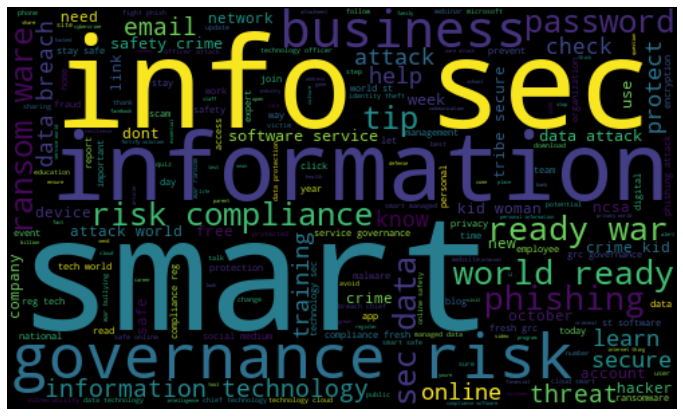

In [20]:
# Visualize by creating word cloud
allWords = ' '.join([text for text in tweet_df_cleanR5['description']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)
plt.figure(figsize=(12,8))
plt.imshow(wordCloud,interpolation = "bilinear")
plt.axis('off')
plt.show()

In [21]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0: 
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [22]:
tweet_df_cleanR5_SA['analysis'] = tweet_df_cleanR5_SA['polarity'].apply(getAnalysis)
tweet_df_cleanR5_SA.head(30)

,author,description,subjectivity,polarity,analysis
0,ECAatState,today officially mark week evolve digital worl...,0.335714,0.003571,positive
1,JuliePerrine,creating strong password crucial measure thats...,0.719048,0.286905,positive
2,craziart,importance smaller step assessment attack info...,0.550000,-0.050000,negative
3,CyberSecurityN8,true owner maximum protection registered devic...,0.650000,0.350000,positive
5,R___83___O,want know consequence ransom ware attack busin...,0.600000,-0.100000,negative
7,NebulaITUK,multifactor authentication help account data s...,0.551515,0.345455,positive
8,cybersec_feeds,speaking webinar nov landscape whats going sta...,0.000000,0.000000,neutral
9,aryannegi009,day tip stay secure smart,0.621429,0.307143,positive
16,911CyberMarket,national alliance ncsa educating empowering gl...,0.400000,0.110000,positive
17,GNYHA,hospital health use health insurance accountab...,0.000000,0.000000,neutral


In [32]:
# # Saving updated DTM, updated cleaned DF and sentiment analysis DF
# dtm2.to_pickle('dtm2.pkl')
# tweet_df_cleanR5.to_pickle('tweet_df_cleanR5.pkl')
# tweet_df_cleanR5_SA.to_pickle('tweet_df_cleanR5_SA.pkl')

In [23]:
# print all of the positive tweets
n = 1 
sortedDF = tweet_df_cleanR5_SA.sort_values(by=['polarity'],ascending=False)
sortedDF.index = [j for j in range(0,sortedDF.shape[0])]
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['analysis'][i] == 'positive'):
        print(str(n) + ') ' + sortedDF['description'][i])
        print()
        n = n+1

1) best data loss prevention dlp software tool attack crime defense risk resilience information information

2) best aqua cloud native ku berne te

3) phishing simulation excellent training resource read article pro tip upgrade phishing simulation email phishing email

4) time year happy halloween job tiro

5) great content jim stickleys missed pandemic

6) great event week germany thank crime

7) proud announce zaya offer trusted execution environment riscv internet thing ot o rtos internet thing

8) runner event completed successfully cutthroat competition team firesale team shah riz bag place team firesale seen point team shah riz scored point sam runner

9) thats wrap panel discussion csam load information insight delivered session kudos team matrix successful event team matrix sc sc sam panel discussion

10) successfully completed bullying browser certification thank organizing information sea skilling learn grow

11) cybereason googlethe better messaging awesome news defense prot

In [24]:
# print all of the negative tweets
n = 1 
sortedDF = tweet_df_cleanR5_SA.sort_values(by=['polarity'],ascending=True)
sortedDF.index = [j for j in range(0,sortedDF.shape[0])]
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['analysis'][i] == 'negative'):
        print(str(n) + ') ' + sortedDF['description'][i])
        print()
        n = n+1

1) story read dont base nft project follower bought fact mermaid project derailed simp mermaid listed article

2) team feel owning clicking bad link watch video ecu irt protect business

3) bullying dont send respond mean insulting message tell parent receive happens online feel uncomfortable talk parent teacher school safety crime

4) believe message fake

5) beware fake loan apps alert

6) trust forward virus warning receive colleague friend fake check instead ncsa

7) shocking fantasy football loss reminded power seamless integration

8) insecure word press plugin expose thousand site takeover attack threat attack account website plugin vulnerability flaw criminal exploit patching

9) warns spy linked trick staff spilling secret

10) password stealing attack surge password data theft malware attack threat criminal scam mers scam fraud internet multi factor authentication

11) hacked u warship facebook account stream game hacking

12) life increasingly dependent technology data gold 

In [25]:
# print all of the neutral tweets
n = 1 
sortedDF = tweet_df_cleanR5_SA.sort_values(by=['polarity'],ascending=True)
sortedDF.index = [j for j in range(0,sortedDF.shape[0])]
for i in range(0,sortedDF.shape[0]):
    if (sortedDF['analysis'][i] == 'neutral'):
        print(str(n) + ') ' + sortedDF['description'][i])
        print()
        n = n+1

1) uniform resource locator url address defines route file web server http server fortify solution knowledge india mumbai

2) scada supervisory control data acquisition attack crime defense risk resilience information information

3) vote week latina recruiter canada check dhara majmundar chrp

4) shivani sharma said people line defense talked governance risk discussed creating organizational level training people sam team matrix sc

5) term serving different type web page based user internet protocol address fortify solution knowledge india mumbai

6) joining week atlis safety workshop attend gain framework building safety team practical step build culture indy school

7) penetration testing intern ive learned learned open web application project web application risk burp suite penetration testing vt foundation

8) allow patch installed browser profile cleanedup browser biggest attack surface

9) katie student team wcrc client relationship manager help member e identify issue coordina

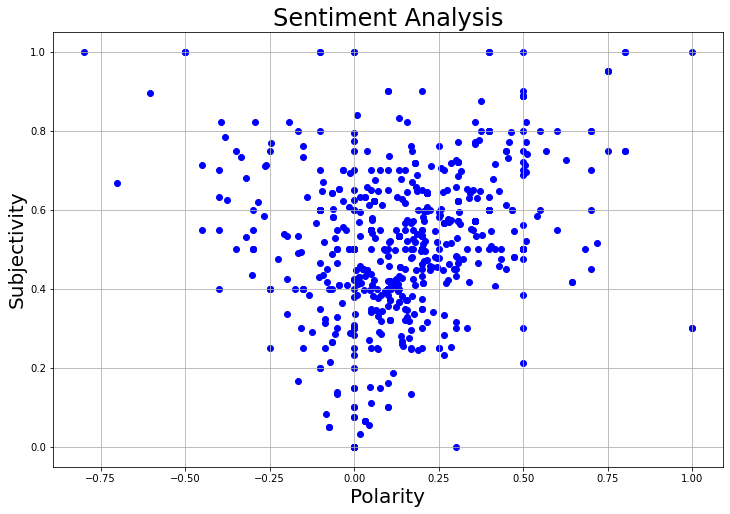

In [26]:
# plot the polarity and the subjectivity
tweet_df_cleanR5_SA.index = [j for j in range(0,sortedDF.shape[0])]

plt.figure(figsize=(12,8))
plt.scatter(tweet_df_cleanR5_SA['polarity'],tweet_df_cleanR5_SA['subjectivity'],color='Blue')
plt.title('Sentiment Analysis',fontsize=24)
plt.xlabel('Polarity',fontsize=20)
plt.ylabel('Subjectivity',fontsize=20)
plt.grid()
plt.show()

In [27]:
# find the percentage of positive tweets
ptweets = tweet_df_cleanR5_SA[tweet_df_cleanR5_SA.analysis == 'positive']
ptweets = ptweets.description
print("Percentage of positive tweets " + str(round(ptweets.shape[0]/tweet_df_cleanR5_SA.shape[0]*100,1)) + "%")

Percentage of positive tweets 62.1%


In [28]:
# find the percentage of positive tweets
negtweets = tweet_df_cleanR5_SA[tweet_df_cleanR5_SA.analysis == 'negative']
negtweets = negtweets.description
print("Percentage of negative tweets " + str(round(negtweets.shape[0]/tweet_df_cleanR5_SA.shape[0]*100,1)) + "%")

Percentage of negative tweets 16.2%


In [29]:
# find the percentage of positive tweets
neutweets = tweet_df_cleanR5_SA[tweet_df_cleanR5_SA.analysis == 'neutral']
neutweets = neutweets.description
print("Percentage of neutral tweets " + str(round(neutweets.shape[0]/tweet_df_cleanR5_SA.shape[0]*100,1)) + "%")

Percentage of neutral tweets 21.8%


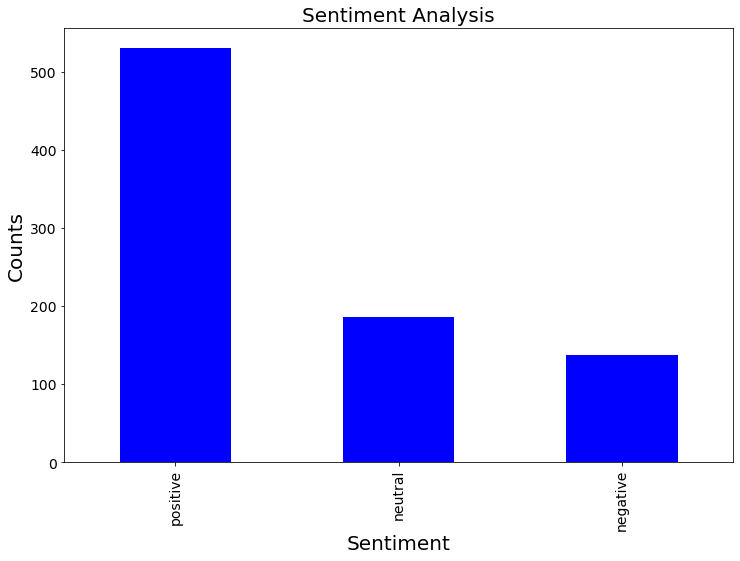

In [30]:
# Show the value counts 
tweet_df_cleanR5_SA['analysis'].value_counts()

# Plot and vsualize the counts
plt.figure(figsize=(12,8))
tweet_df_cleanR5_SA['analysis'].value_counts().plot(kind='bar',fontsize=14,color = "Blue")
plt.title('Sentiment Analysis',fontsize=20)
plt.xlabel('Sentiment',fontsize=20)
plt.ylabel('Counts',fontsize=20)
plt.show()